In [30]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import squarify

In [32]:
df=pd.read_csv("s-e.csv")
df.head(5).style.set_properties(**{'border': '1.3px solid blue','color': 'green','padding':'10px'})

In [33]:
df=df.drop("MobileSubs/100",axis=1)
df=df.drop("GNIAtlas",axis=1)
df=df.drop("AdolFertRate",axis=1)
df.head(5)

Year           Country   Region           SubRegion  SurfAreaSqKm  \
0  2000.0       Afghanistan     Asia       Southern Asia      652860.0   
1  2000.0             Malta   Europe     Southern Europe         320.0   
2  2000.0           Belgium   Europe      Western Europe       30530.0   
3  2000.0  Marshall Islands  Oceania          Micronesia         180.0   
4  2000.0        Mauritania   Africa  Sub-Saharan Africa     1030700.0   

     PopTotal      PopDens  PopGrowth%           GDP  GDPGrowth%  ...  \
0  19542982.0    29.963329    1.443803  1.801248e+10   -5.206288  ...   
1    390087.0  1219.021875    0.645267  4.323339e+09   19.681791  ...   
2  10251250.0   338.548547    0.242518  2.367925e+11    3.716679  ...   
3     54224.0   301.244444    0.721838  1.153475e+08    1.354079  ...   
4   2695003.0     2.614731    2.799182  1.779521e+09   -3.918026  ...   

      FDINetBoP  GNI/CapAtlas  Imports%GDP  IndValAdd%GDP  InflConsPric%  \
0  1.700000e+05    916.923281    41.312634      17.178775      37.611028   
1  7.431853e+08  10950.000000   128.374581      26.939987      -4.512396   
2  8.873871e+10  25890.000000    69.682740      24.943833       2.014617   
3  7.390000e+05   2770.000000   100.812761      12.681072      -0.454689   
4  4.009600e+07    710.000000    33.423259      29.951850       6.351587   

   LifeExpBirth  MerchTrade%GDP  MortRateU5    NetMigr  UrbanPopGrowth%  
0     55.298000       52.777048       129.3 -1007135.0         1.861377  
1     78.348780      135.682159         7.6     1799.0         0.952299  
2     77.721951      154.515900         5.9    32262.0         0.308431  
3     63.275000       55.484514        42.1    -1323.0         1.492787  
4     61.028000       45.461676        98.8    -2997.0         2.476860  

[5 rows x 23 columns]

In [34]:
df.isnull().sum()

Year               0
Country            0
Region             0
SubRegion          0
SurfAreaSqKm       0
PopTotal           0
PopDens            0
PopGrowth%         0
GDP                0
GDPGrowth%         0
AgriValAdd%GDP     0
Exports%GDP        0
FertRate           0
FDINetBoP          0
GNI/CapAtlas       0
Imports%GDP        0
IndValAdd%GDP      0
InflConsPric%      0
LifeExpBirth       0
MerchTrade%GDP     0
MortRateU5         0
NetMigr            0
UrbanPopGrowth%    0
dtype: int64

In [35]:
df.duplicated().sum()

0

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4444 entries, 0 to 4443
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             4444 non-null   float64
 1   Country          4444 non-null   object 
 2   Region           4444 non-null   object 
 3   SubRegion        4444 non-null   object 
 4   SurfAreaSqKm     4444 non-null   float64
 5   PopTotal         4444 non-null   float64
 6   PopDens          4444 non-null   float64
 7   PopGrowth%       4444 non-null   float64
 8   GDP              4444 non-null   float64
 9   GDPGrowth%       4444 non-null   float64
 10  AgriValAdd%GDP   4444 non-null   float64
 11  Exports%GDP      4444 non-null   float64
 12  FertRate         4444 non-null   float64
 13  FDINetBoP        4444 non-null   float64
 14  GNI/CapAtlas     4444 non-null   float64
 15  Imports%GDP      4444 non-null   float64
 16  IndValAdd%GDP    4444 non-null   float64
 17  InflConsPric% 

In [37]:
df.describe()

Year  SurfAreaSqKm      PopTotal       PopDens   PopGrowth%  \
count  4444.000000  4.444000e+03  4.444000e+03   4444.000000  4444.000000   
mean   2010.500000  6.640703e+05  3.445608e+07    312.879045     1.374862   
std       6.345003  1.888320e+06  1.331737e+08   1501.365686     1.542070   
min    2000.000000  2.000000e+01  9.609000e+03      0.136492    -6.852118   
25%    2005.000000  1.782000e+04  1.231632e+06     31.308813     0.425132   
50%    2010.500000  1.113700e+05  6.469593e+06     79.320522     1.255840   
75%    2016.000000  5.053700e+05  2.230908e+07    184.349845     2.267222   
max    2021.000000  1.709825e+07  1.412360e+09  21594.800000    19.360429   

                GDP   GDPGrowth%  AgriValAdd%GDP  Exports%GDP     FertRate  \
count  4.444000e+03  4444.000000     4444.000000  4444.000000  4444.000000   
mean   3.194480e+11     3.268364       10.962849    44.263785     2.886696   
std    1.411696e+12     5.749729       11.195331    29.124115     1.499746   
min    1.396473e+07   -54.235900        0.012519     2.249870     0.772000   
25%    4.558559e+09     1.099784        2.088816    24.622995     1.710000   
50%    1.977252e+10     3.494868        6.979923    38.530971     2.381500   
75%    1.288408e+11     5.857273       17.192146    60.796237     3.807250   
max    2.331508e+13    86.826748       79.042362   228.993771     7.732000   

          FDINetBoP   GNI/CapAtlas  Imports%GDP  IndValAdd%GDP  InflConsPric%  \
count  4.444000e+03    4444.000000  4444.000000    4444.000000    4444.000000   
mean   8.949895e+09   12344.300408    50.468908      25.721662       7.500906   
std    3.651113e+10   18030.552992    27.432700      12.395006      43.558717   
min   -3.303385e+11     110.000000     1.877678       2.758632     -30.199654   
25%    8.813284e+07    1410.000000    30.200552      17.387792       1.442125   
50%    6.421151e+08    4410.000000    44.884701      23.565796       3.713096   
75%    4.009787e+09   14762.500000    66.561876      30.813010       7.945621   
max    7.338265e+11  122130.000000   221.009959      86.669555    2630.122674   

       LifeExpBirth  MerchTrade%GDP   MortRateU5       NetMigr  \
count   4444.000000     4444.000000  4444.000000  4.444000e+03   
mean      70.230413       64.729675    37.743370  2.013533e+02   
std        8.773385       41.686167    39.387756  1.764569e+05   
min       41.957000        7.805932     2.000000 -2.290411e+06   
25%       64.433500       40.191608     9.200000 -2.015975e+04   
50%       72.027415       55.318351    23.100000 -9.945000e+02   
75%       76.809049       77.437441    52.200000  1.032225e+04   
max       85.497561      420.661372   228.500000  1.479676e+06   

       UrbanPopGrowth%  
count      4444.000000  
mean          2.034387  
std           1.960524  
min          -8.830483  
25%           0.649020  
50%           1.859358  
75%           3.211583  
max          19.612031

In [38]:
df.shape

(4444, 23)

In [39]:
df.columns

Index(['Year', 'Country', 'Region', 'SubRegion', 'SurfAreaSqKm', 'PopTotal',
       'PopDens', 'PopGrowth%', 'GDP', 'GDPGrowth%', 'AgriValAdd%GDP',
       'Exports%GDP', 'FertRate', 'FDINetBoP', 'GNI/CapAtlas', 'Imports%GDP',
       'IndValAdd%GDP', 'InflConsPric%', 'LifeExpBirth', 'MerchTrade%GDP',
       'MortRateU5', 'NetMigr', 'UrbanPopGrowth%'],
      dtype='object')

In [40]:
corr=df.select_dtypes(include="float64").corr(method="pearson").round(2)
corr

Year  SurfAreaSqKm  PopTotal  PopDens  PopGrowth%   GDP  \
Year             1.00          0.00      0.02     0.01       -0.08  0.06   
SurfAreaSqKm     0.00          1.00      0.45    -0.06       -0.03  0.49   
PopTotal         0.02          0.45      1.00    -0.02       -0.03  0.47   
PopDens          0.01         -0.06     -0.02     1.00        0.01 -0.02   
PopGrowth%      -0.08         -0.03     -0.03     0.01        1.00 -0.10   
GDP              0.06          0.49      0.47    -0.02       -0.10  1.00   
GDPGrowth%      -0.16          0.03      0.08     0.02        0.15 -0.02   
AgriValAdd%GDP  -0.08         -0.05      0.03    -0.12        0.27 -0.14   
Exports%GDP      0.02         -0.19     -0.16     0.33       -0.06 -0.13   
FertRate        -0.13         -0.06     -0.05    -0.16        0.56 -0.16   
FDINetBoP        0.03          0.39      0.37     0.06       -0.10  0.69   
GNI/CapAtlas     0.15          0.05     -0.05     0.20       -0.09  0.26   
Imports%GDP      0.02         -0.28     -0.21     0.21       -0.11 -0.19   
IndValAdd%GDP   -0.03          0.12      0.11    -0.15        0.14  0.02   
InflConsPric%   -0.05          0.03      0.00    -0.02        0.04 -0.02   
LifeExpBirth     0.19          0.03      0.01     0.19       -0.35  0.19   
MerchTrade%GDP  -0.01         -0.16     -0.13     0.21       -0.10 -0.11   
MortRateU5      -0.21         -0.04      0.00    -0.05        0.43 -0.15   
NetMigr          0.00          0.23     -0.14    -0.00        0.16  0.40   
UrbanPopGrowth% -0.08         -0.02      0.05    -0.03        0.90 -0.08   

                 GDPGrowth%  AgriValAdd%GDP  Exports%GDP  FertRate  FDINetBoP  \
Year                  -0.16           -0.08         0.02     -0.13       0.03   
SurfAreaSqKm           0.03           -0.05        -0.19     -0.06       0.39   
PopTotal               0.08            0.03        -0.16     -0.05       0.37   
PopDens                0.02           -0.12         0.33     -0.16       0.06   
PopGrowth%             0.15            0.27        -0.06      0.56      -0.10   
GDP                   -0.02           -0.14        -0.13     -0.16       0.69   
GDPGrowth%             1.00            0.11         0.02      0.11       0.01   
AgriValAdd%GDP         0.11            1.00        -0.39      0.65      -0.16   
Exports%GDP            0.02           -0.39         1.00     -0.34       0.05   
FertRate               0.11            0.65        -0.34      1.00      -0.18   
FDINetBoP              0.01           -0.16         0.05     -0.18       1.00   
GNI/CapAtlas          -0.11           -0.47         0.36     -0.44       0.28   
Imports%GDP            0.01           -0.16         0.78     -0.19      -0.03   
IndValAdd%GDP          0.10           -0.22         0.04     -0.03      -0.01   
InflConsPric%         -0.02            0.07        -0.05      0.09      -0.02   
LifeExpBirth          -0.12           -0.63         0.31     -0.83       0.21   
MerchTrade%GDP         0.07           -0.24         0.67     -0.26       0.06   
MortRateU5             0.13            0.65        -0.29      0.86      -0.16   
NetMigr                0.02           -0.19         0.08     -0.11       0.29   
UrbanPopGrowth%        0.18            0.39        -0.15      0.62      -0.09   

                 GNI/CapAtlas  Imports%GDP  IndValAdd%GDP  InflConsPric%  \
Year                     0.15         0.02          -0.03          -0.05   
SurfAreaSqKm             0.05        -0.28           0.12           0.03   
PopTotal                -0.05        -0.21           0.11           0.00   
PopDens                  0.20         0.21          -0.15          -0.02   
PopGrowth%              -0.09        -0.11           0.14           0.04   
GDP                      0.26        -0.19           0.02          -0.02   
GDPGrowth%              -0.11         0.01           0.10          -0.02   
AgriValAdd%GDP          -0.47        -0.16          -0.22           0.07   
Exports%GDP              0.36     

<Axes: >

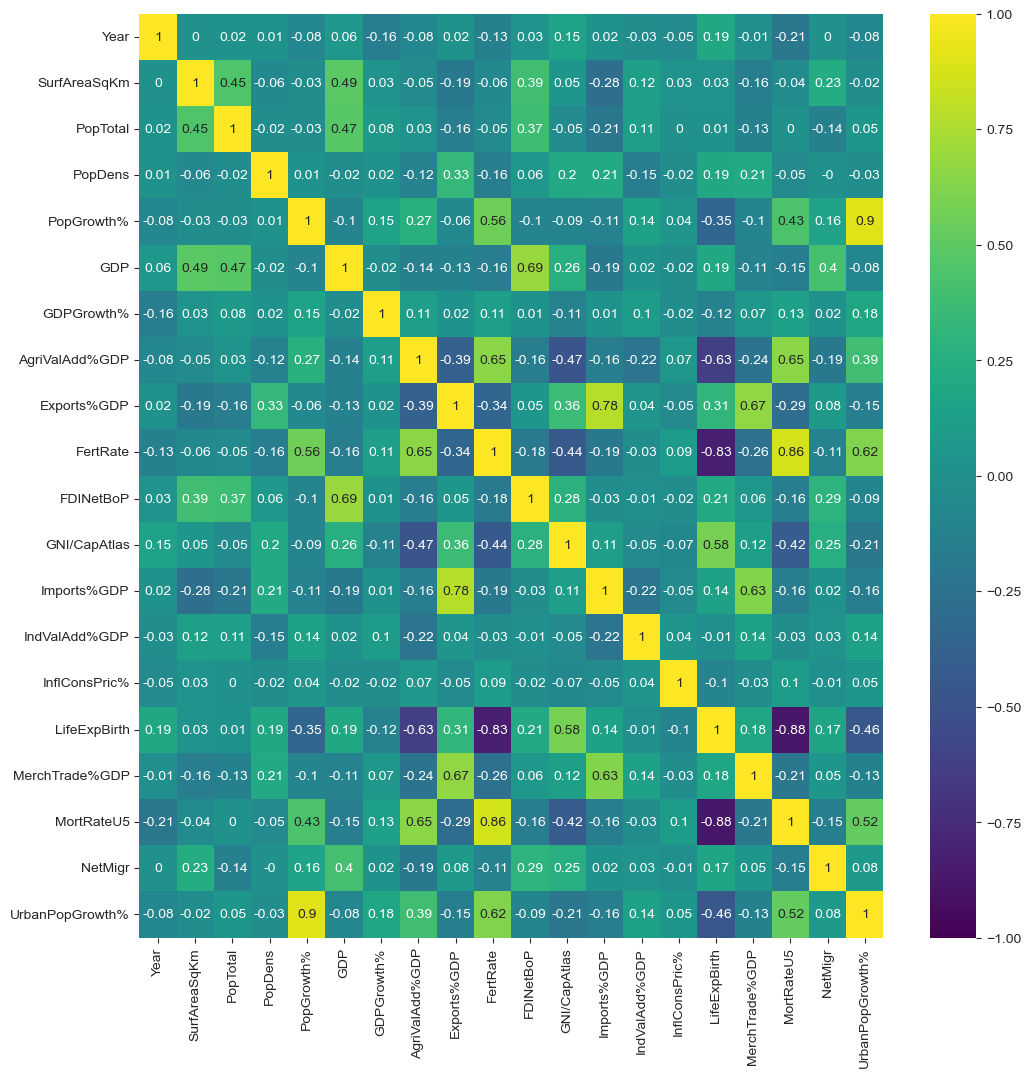

In [41]:
plt.figure(figsize=(12,12))
sns.heatmap(corr.round(2),annot=True,vmin=-1,vmax=1,cmap="viridis")

In [42]:
mask=np.triu(np.ones_like(corr,dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [Fa

<Axes: >

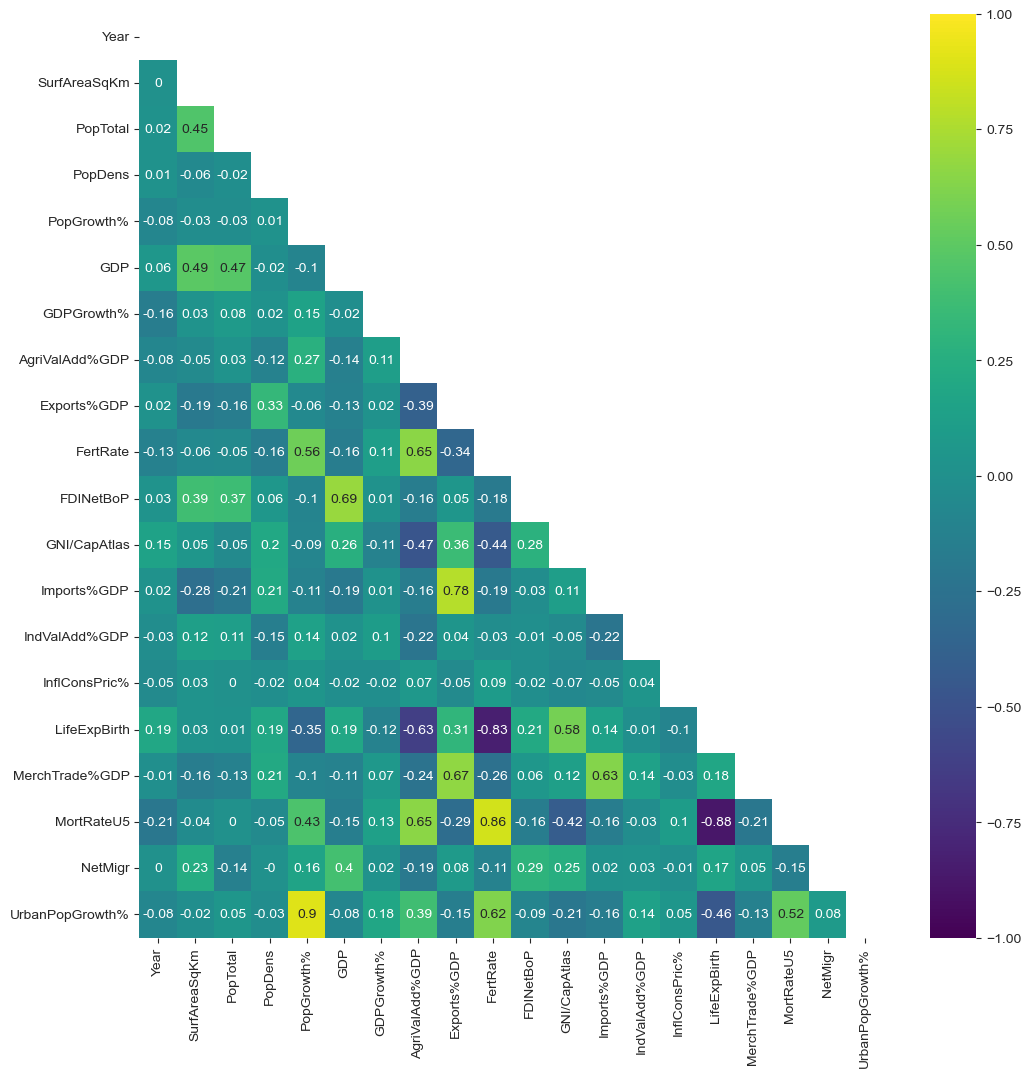

In [43]:
plt.figure(figsize=(12,12))
sns.heatmap(corr.round(2),annot=True,vmin=-1,vmax=1,cmap="viridis",mask=mask)

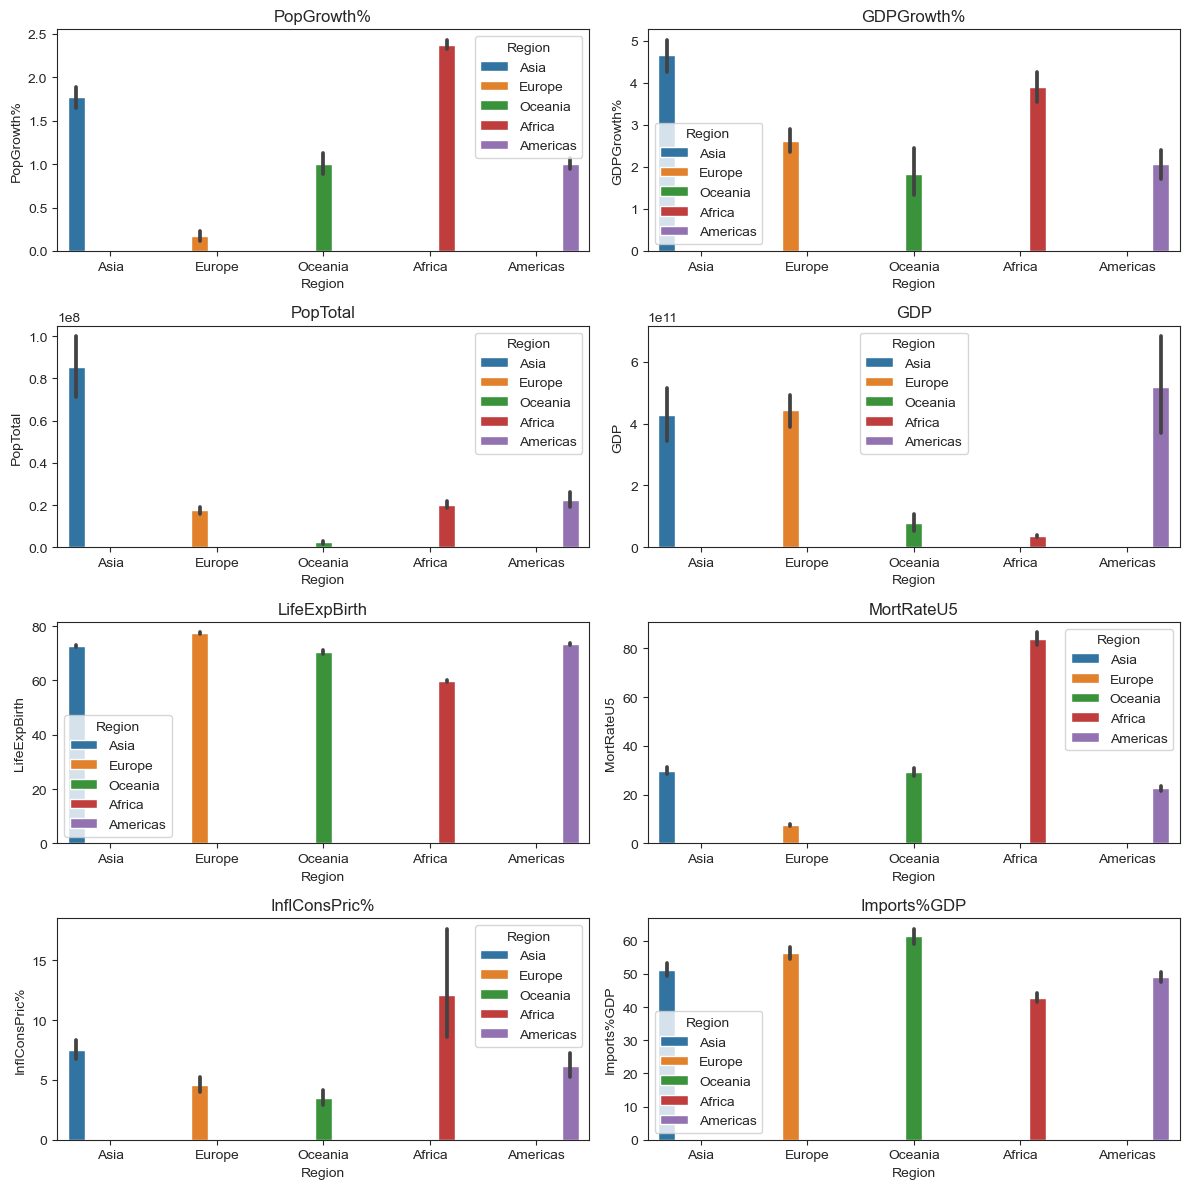

In [44]:
plt.figure(figsize=(12,12))
c=["PopGrowth%","GDPGrowth%","PopTotal","GDP","LifeExpBirth","MortRateU5","InflConsPric%","Imports%GDP"]
j=1
for i in c:
    plt.subplot(4,2,j)
    plt.title(i)
    sns.barplot(data=df,x="Region",y=i,hue="Region")
    j+=1
plt.tight_layout()

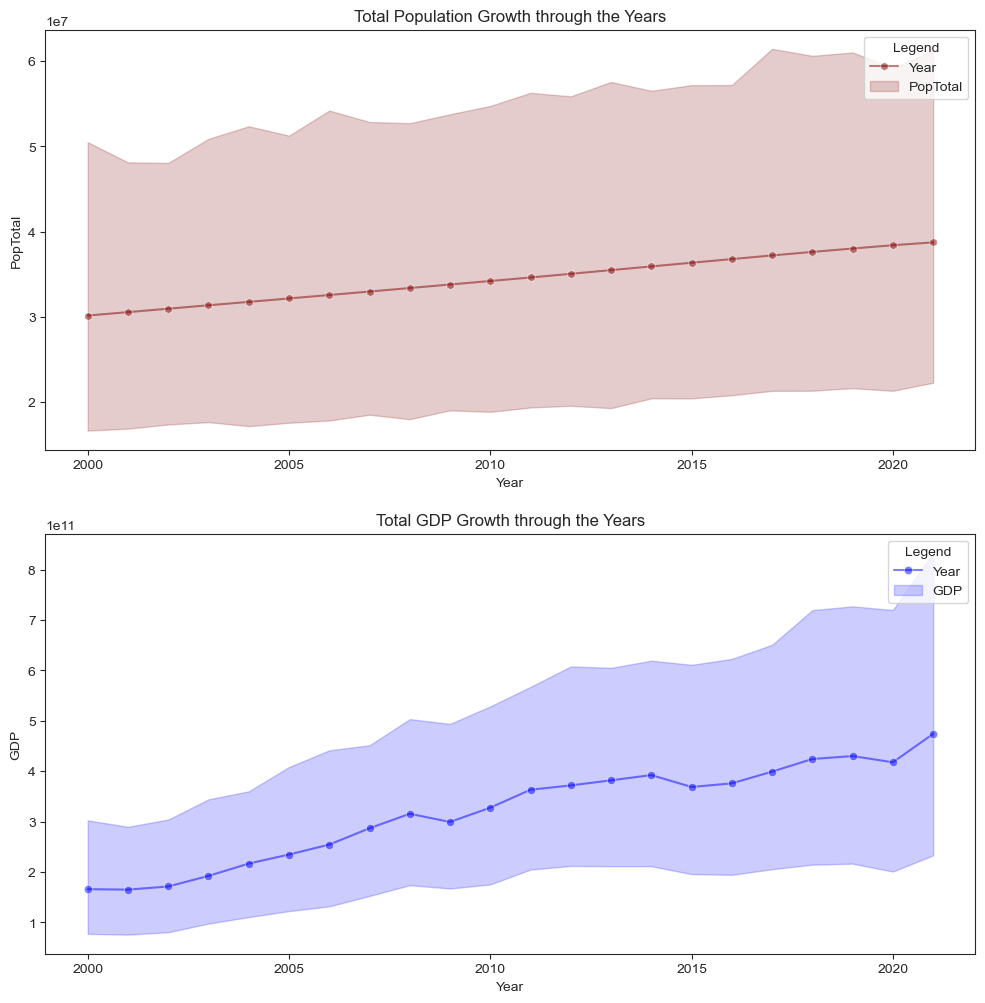

In [45]:
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.title("Total Population Growth through the Years")
sns.lineplot(data=df,x="Year",y="PopTotal",marker="h",alpha=0.5,color="maroon")
plt.legend(title="Legend",labels=["Year","PopTotal"])
plt.subplot(2,1,2)
plt.title("Total GDP Growth through the Years")
sns.lineplot(data=df,x="Year",y="GDP",marker="o",alpha=0.5,color="blue")
plt.legend(title="Legend",labels=["Year","GDP"])

<Figure size 1200x1200 with 0 Axes>

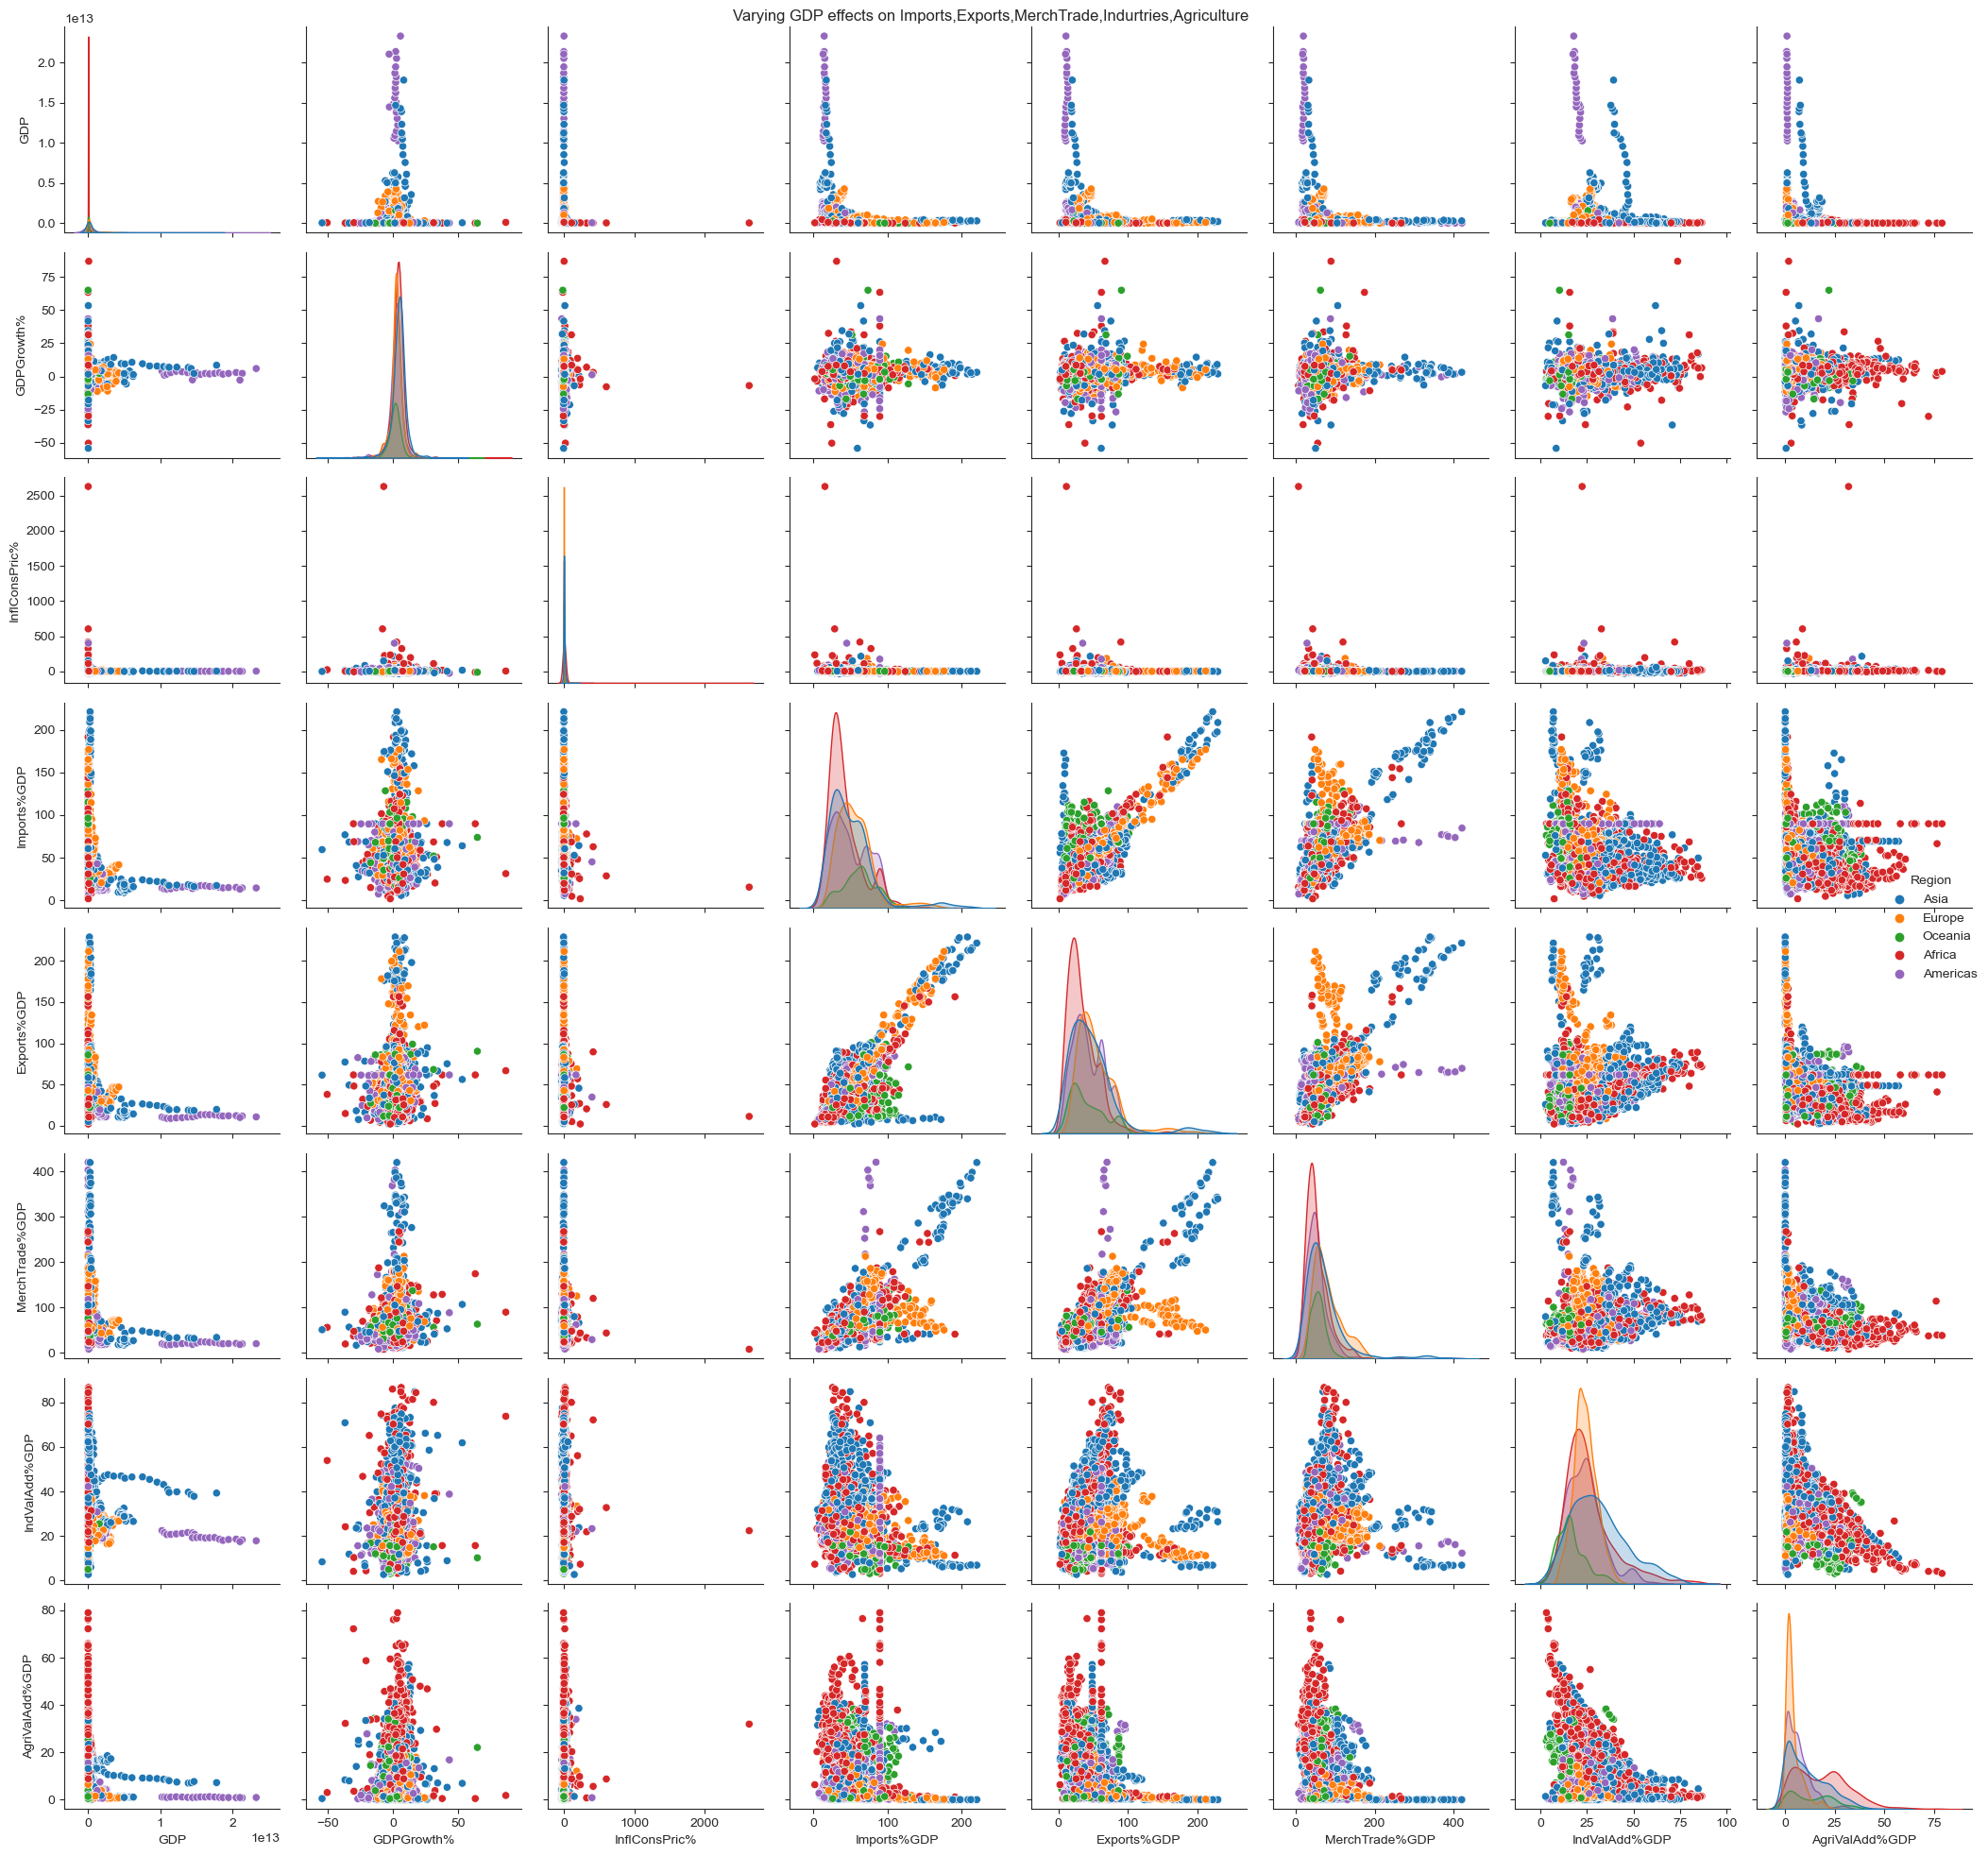

In [46]:
plt.figure(figsize=(12,12))
d=df[["GDP","GDPGrowth%","InflConsPric%","Imports%GDP","Exports%GDP","Region","MerchTrade%GDP","IndValAdd%GDP","AgriValAdd%GDP"]]
sns.pairplot(data=d,hue="Region")
plt.suptitle("Varying GDP effects on Imports,Exports,MerchTrade,Indurtries,Agriculture")
plt.tight_layout()

<Figure size 1200x1200 with 0 Axes>

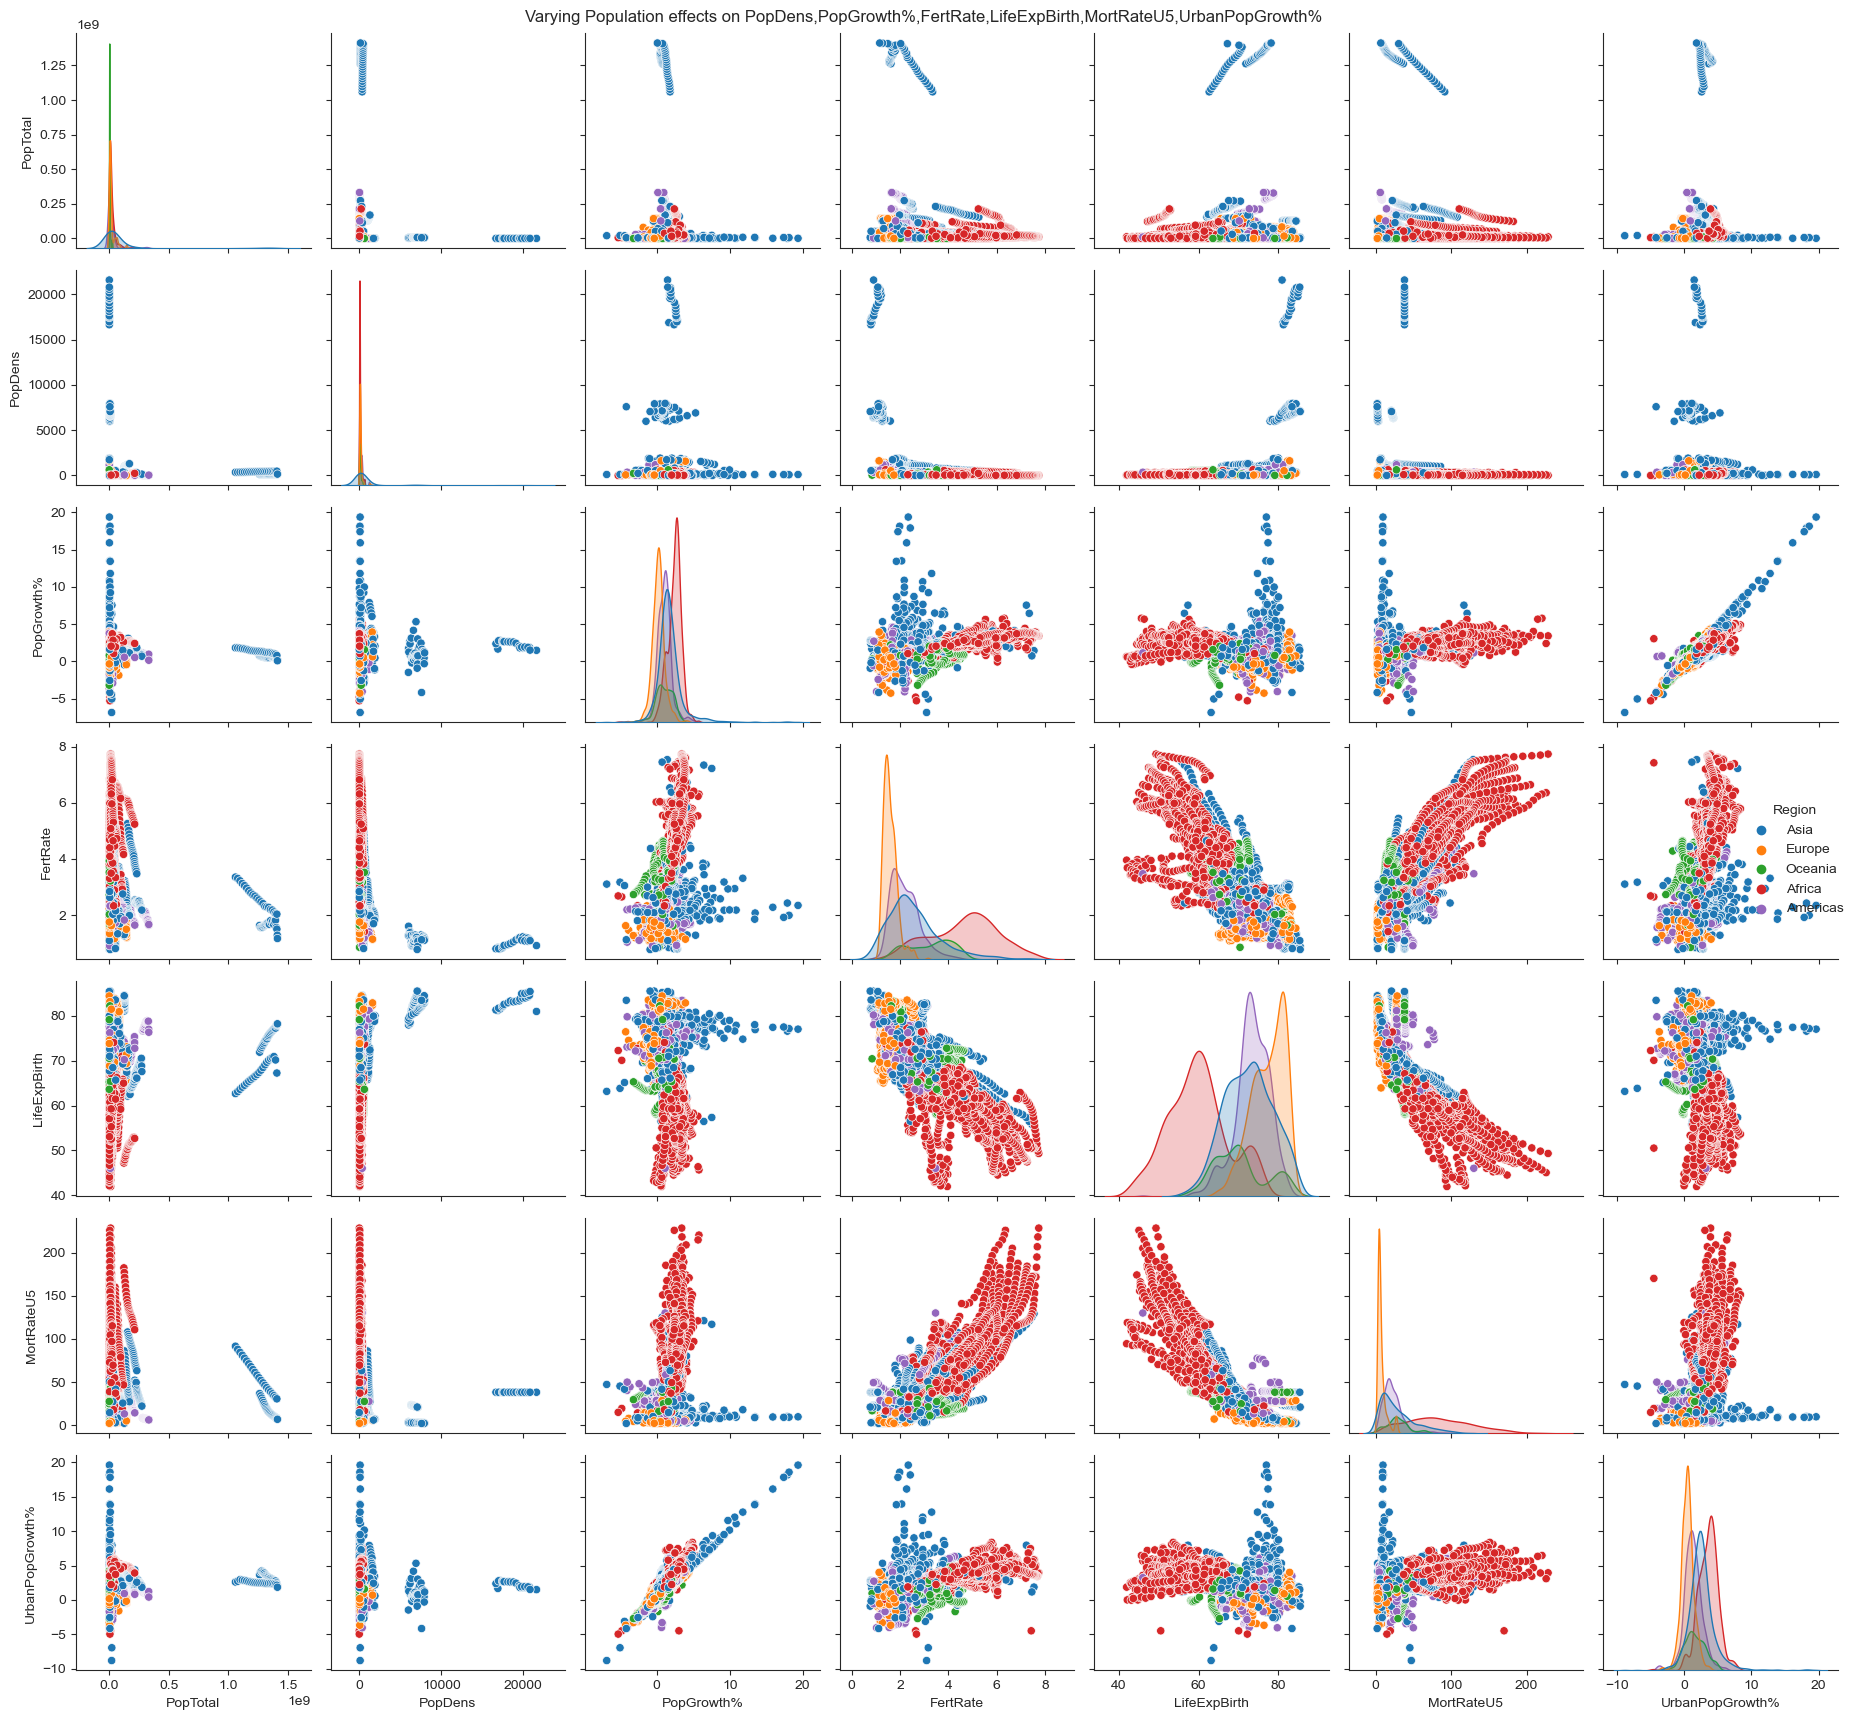

In [47]:
    plt.figure(figsize=(12,12))
    d=df[["PopTotal","PopDens","PopGrowth%","FertRate","LifeExpBirth","MortRateU5","UrbanPopGrowth%","Region"]]
    sns.pairplot(data=d,hue="Region")
    plt.suptitle("Varying Population effects on PopDens,PopGrowth%,FertRate,LifeExpBirth,MortRateU5,UrbanPopGrowth%")
    plt.tight_layout()

Text(0.5, 1.0, 'Relationship between Life Expectancy and Fertility Rate')

<Figure size 1200x1200 with 0 Axes>

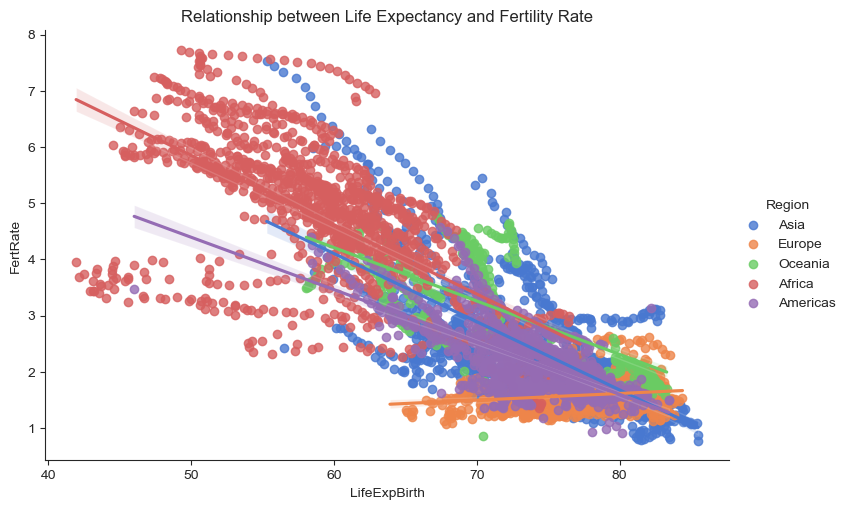

In [48]:
plt.figure(figsize=(12,12))
sns.lmplot(data=df,x="LifeExpBirth",y="FertRate",hue="Region",aspect=1.5,palette="muted")
plt.title("Relationship between Life Expectancy and Fertility Rate")

<Axes: title={'center': 'Average Urban Population Growth Rate for Each SubRegion'}, xlabel='UrbanPopGrowth%', ylabel='SubRegion'>

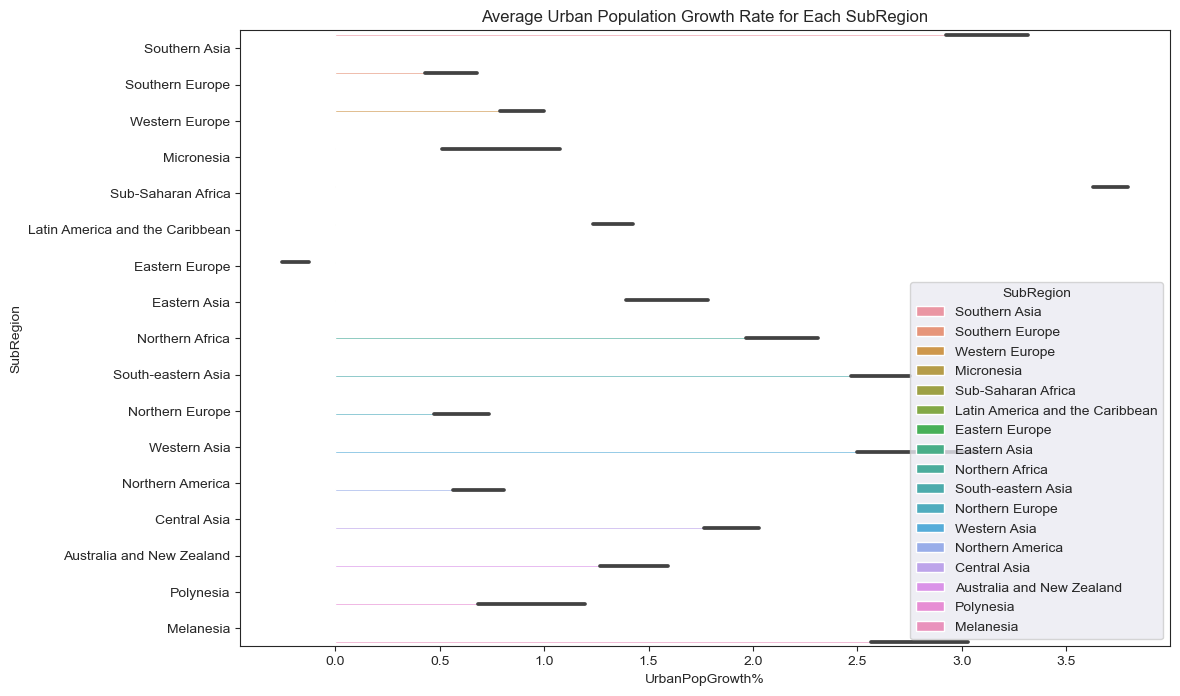

In [49]:
plt.figure(figsize=(12,8))
plt.title("Average Urban Population Growth Rate for Each SubRegion")
sns.set_style("darkgrid")
sns.barplot(data=df,x="UrbanPopGrowth%",y="SubRegion",hue="SubRegion")

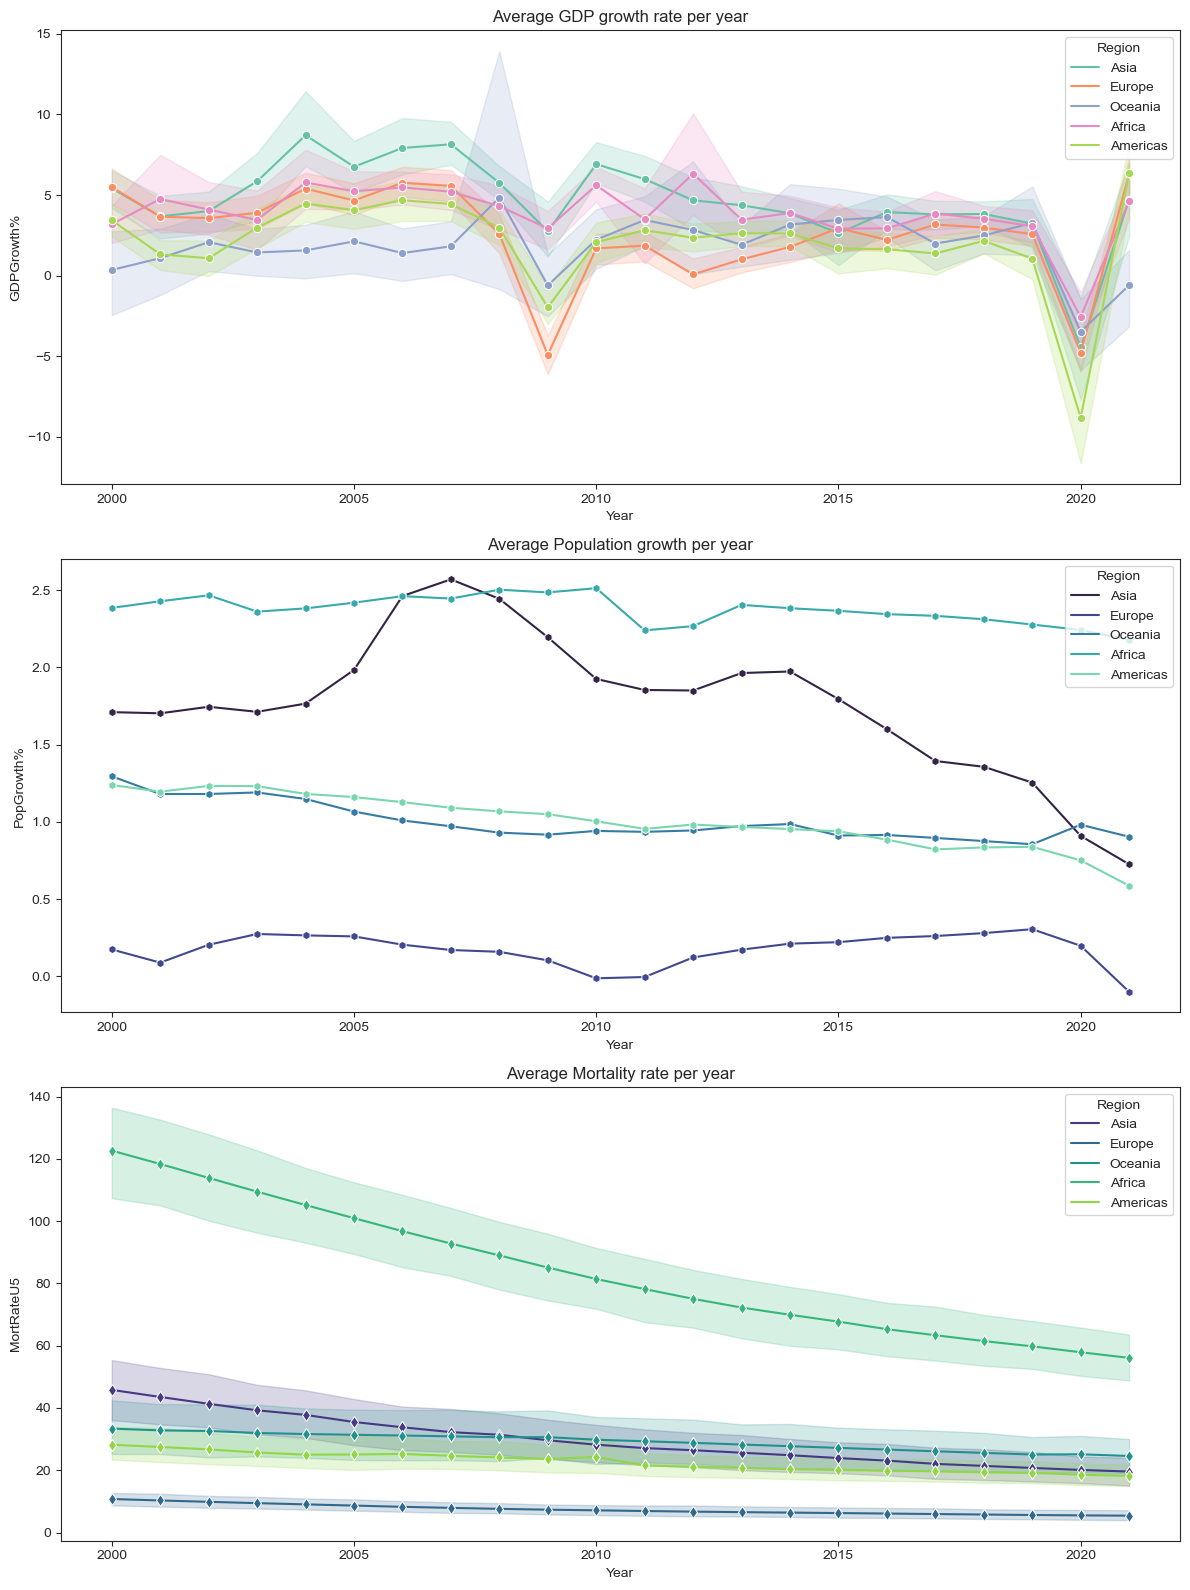

In [50]:
plt.figure(figsize=(12, 16))
sns.set_style("ticks")
plt.subplot(3,1,1)
plt.title("Average GDP growth rate per year")
sns.lineplot(x='Year', y='GDPGrowth%', hue='Region', data=df, marker='o', palette='Set2')
plt.subplot(3,1,2)
plt.title("Average Population growth per year")
sns.lineplot(x="Year" ,y="PopGrowth%",data=df,hue="Region",palette="mako" ,marker="h", errorbar=None)
plt.subplot(3,1,3)
plt.title("Average Mortality rate per year")
sns.lineplot(x="Year",y="MortRateU5",data=df,hue="Region",palette="viridis",marker="d")
plt.tight_layout()

In [51]:
plt.figure(figsize=(12,12))
fig = px.choropleth(df, locations='Country', locationmode='country names', color='PopTotal',
                    hover_name='Country', color_continuous_scale='Viridis',
                    title='Choropleth Map: Total Population by Country',height=800,width=1000)
fig.show()

<Figure size 1200x1200 with 0 Axes>

(0.0, 100.0, 0.0, 100.0)

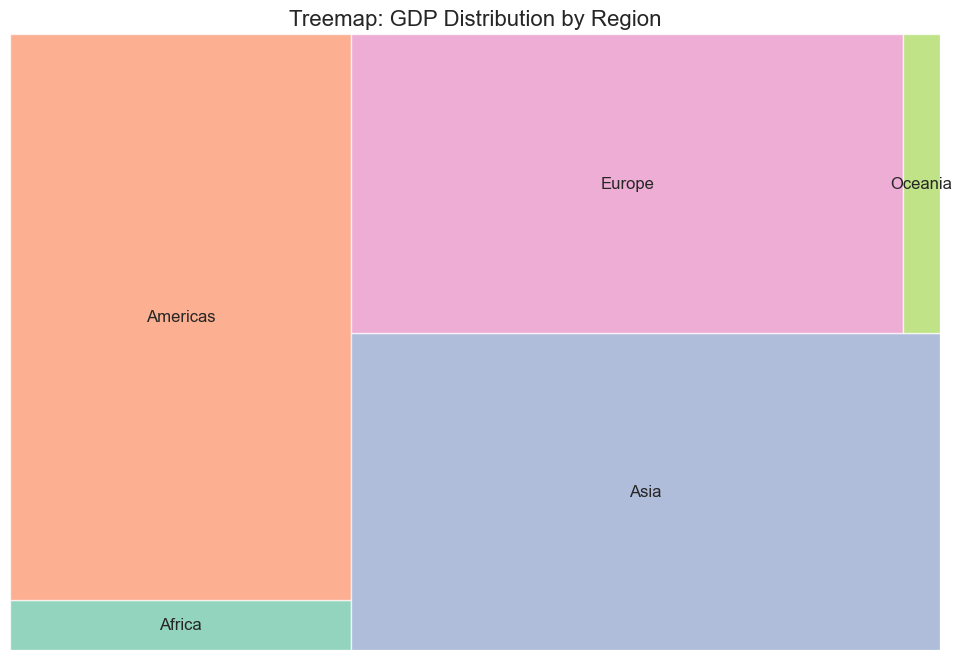

In [52]:
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']
region_gdp = df.groupby('Region')['GDP'].sum().reset_index()
plt.figure(figsize=(12, 8))
squarify.plot(sizes=region_gdp['GDP'], label=region_gdp['Region'], color=colors, alpha=0.7, text_kwargs={'fontsize': 12})
plt.title('Treemap: GDP Distribution by Region', fontsize=16)
plt.axis('off')

(0.0, 100.0, 0.0, 100.0)

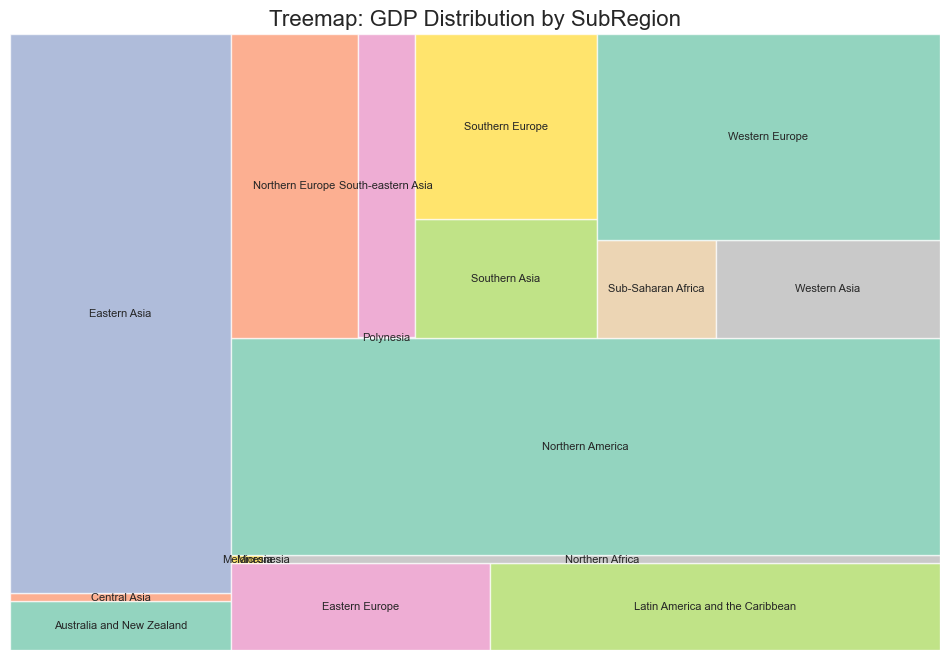

In [53]:
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']
region_gdp = df.groupby('SubRegion')['GDP'].sum().reset_index()
plt.figure(figsize=(12, 8))
squarify.plot(sizes=region_gdp['GDP'], label=region_gdp['SubRegion'], color=colors, alpha=0.7, text_kwargs={'fontsize': 8})
plt.title('Treemap: GDP Distribution by SubRegion', fontsize=16)
plt.axis('off')

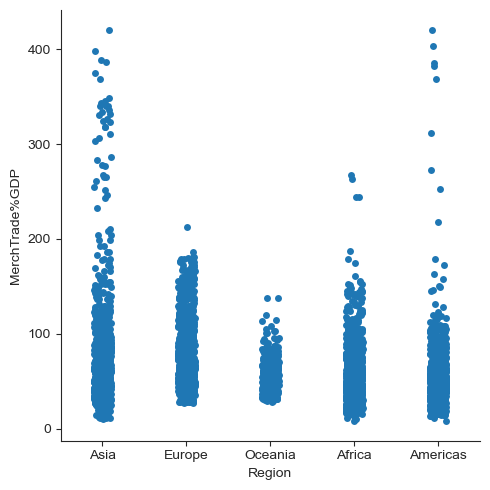

In [54]:
sns.catplot(x=df["Region"] ,y=df['MerchTrade%GDP'])
plt.show()

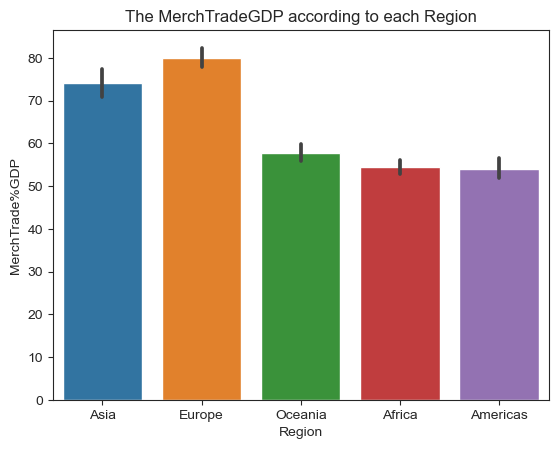

In [55]:
import statistics
sns.barplot(x=df['Region'],y=df['MerchTrade%GDP'])
plt.title("The MerchTradeGDP according to each Region")
plt.show()

Text(0.5, 1.0, 'Fertility Rate of each Region according to Year')

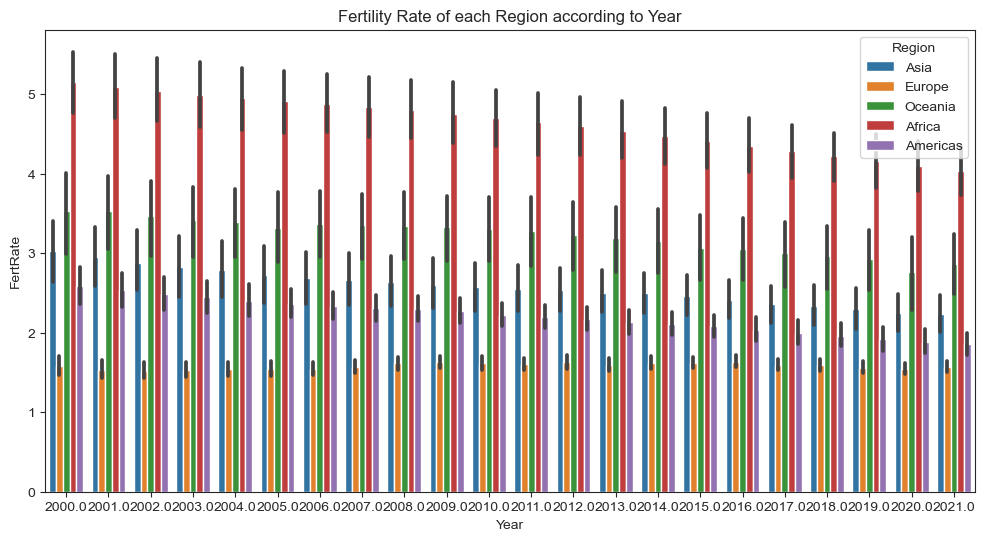

In [74]:
plt.figure(figsize=(12,6))
sns.barplot(y=df['FertRate'],x=df['Year'],hue=df["Region"])
plt.title("Fertility Rate of each Region according to Year")

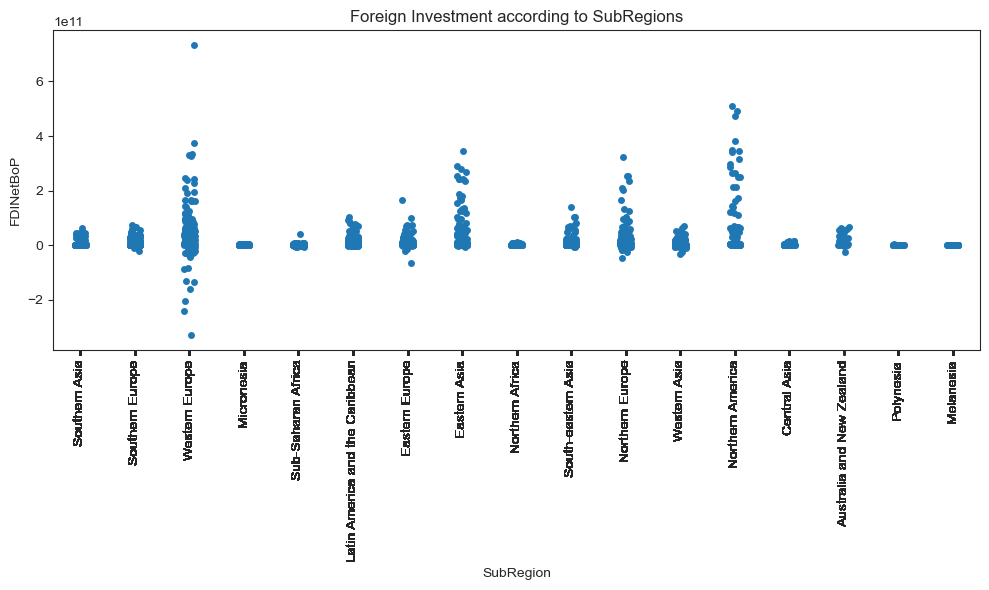

In [75]:
plt.figure(figsize=(10,6))
sns.stripplot(data=df,x='SubRegion',y='FDINetBoP')
plt.xticks(df['SubRegion'], rotation='vertical')
plt.title("Foreign Investment according to SubRegions")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Net Migration of People each Year')

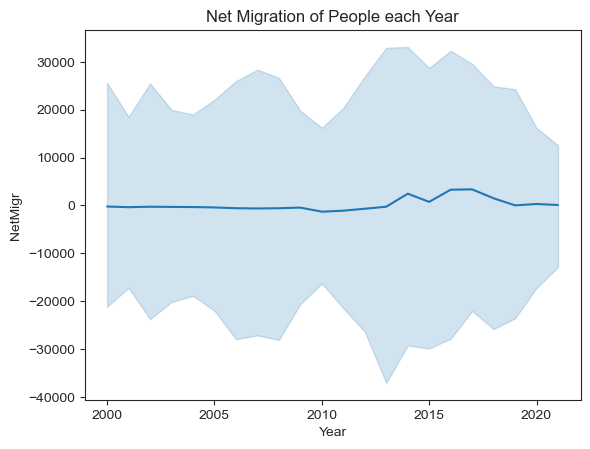

In [76]:
sns.lineplot(x='Year',y='NetMigr',data=df)
plt.title("Net Migration of People each Year")

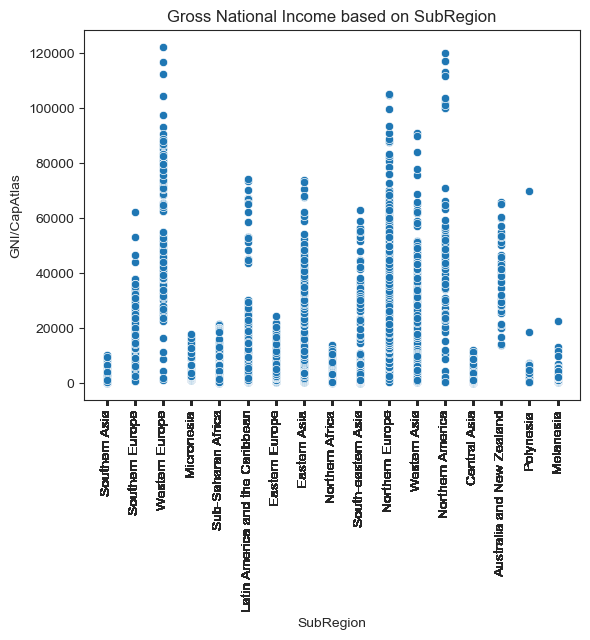

In [77]:
sns.scatterplot(data=df,x='SubRegion',y='GNI/CapAtlas')
plt.xticks(df['SubRegion'], rotation='vertical')
plt.show()

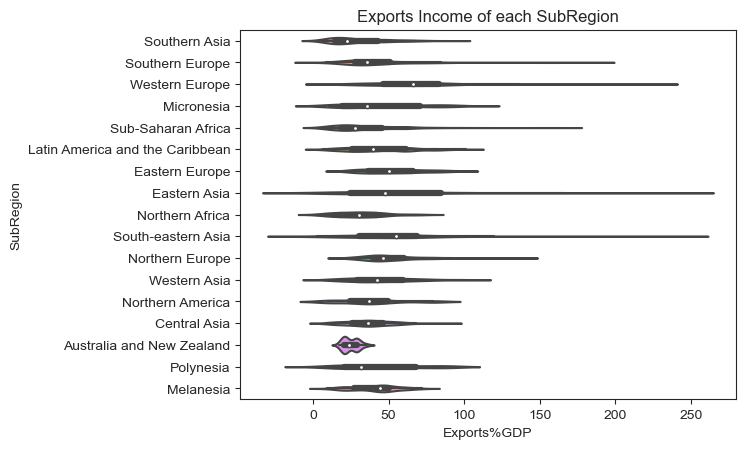

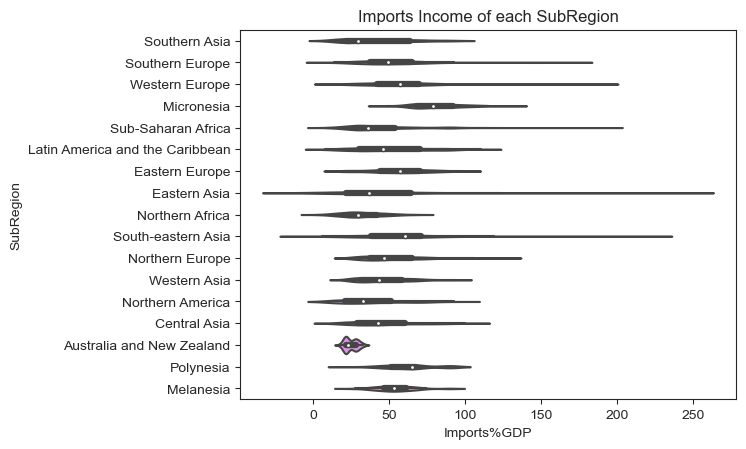

In [81]:
sns.violinplot(data=df,x='Exports%GDP',y='SubRegion')
plt.title("Exports Income of each SubRegion")
plt.show()
sns.violinplot(data=df,x='Imports%GDP',y='SubRegion')
plt.title("Imports Income of each SubRegion")
plt.show()